In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

result_string = 'data/out.png'
start_string = 'data/input.png'
target_string = 'data/ref.png'

start_img = Image.open(start_string)
target_img = Image.open(target_string)

start_array = np.array(start_img)[:,:,0]
target_array = np.array(target_img)[:,:,0]

height = start_array.shape[0]
width = start_array.shape[1]

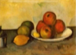

In [16]:
start_img

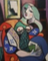

In [17]:
target_img

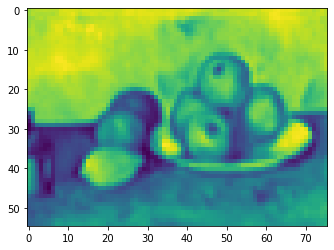

In [18]:
plt.imshow(start_array)

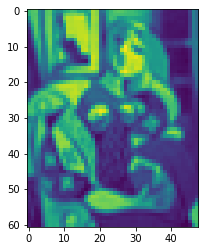

In [19]:
plt.imshow(target_array)

In [20]:
def pic_as_list(array):
    list_of_pixels = []
    for x in range(height):
        for y in range(width):
            color = array[x,y]
            list_of_pixels.append([x,y,color])
    return sorted(list_of_pixels, key=lambda x: (x[2], x[0], x[1]))
  
def transport_colors(start_array, target_array):
    
    list_start = pic_as_list(start_array)
    hist_target = [(target_array==color).sum() for color in range(256)]
    
    ind = 0
    for color in range(256):
        while hist_target[color] > 0:
            list_start[ind][2] = color
            hist_target[color] = hist_target[color] - 1
            ind = ind + 1
            
    target = np.zeros((height,width))
    for pixel in list_start:
        x, y, color = pixel
        target[x,y] = color       
    return target

In [ ]:
pic_list = pic_as_list(start_array)

In [21]:
final_picture = np.zeros((height,width, 3))

final_picture[:,:,0] = transport_colors(start_array, target_array)
final_picture[:,:,1] = transport_colors(start_array, target_array)
final_picture[:,:,2] = transport_colors(start_array, target_array)

final_picture = final_picture.astype(np.uint8)
img = Image.fromarray(final_picture)
img.save(result_string)

In [22]:
start_img = Image.open(start_string)
target_img = Image.open(target_string)

start_array = np.array(start_img)
target_array = np.array(target_img)

height = start_array.shape[0]
width = start_array.shape[1]

final_picture = np.zeros((height,width, 3))

final_picture[:,:,0] = transport_colors(start_array[:,:,0], target_array[:,:,0])
final_picture[:,:,1] = transport_colors(start_array[:,:,1], target_array[:,:,1])
final_picture[:,:,2] = transport_colors(start_array[:,:,2], target_array[:,:,2])

final_picture = final_picture.astype(np.uint8)
img = Image.fromarray(final_picture)
img.save(result_string)